In [11]:
import numpy as np
from scipy import linalg
from math import ceil


In [21]:
def lowess(x, y, f=2./3., iter = 3):
    n = len(x)
    r = int(ceil(n*f))
    h = [np.sort(np.abs(x-x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:,None]-x[None,:])/h), 0.0, 1.0)
    w = (1-w**3)**3
    yest = np.zeros(n)
    delta = np.ones(n)
    
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights*y), np.sum(weights*y*x)])
            A = np.array([[np.sum(weights), np.sum(weights*x)],[np.sum(weights*x), np.sum(weights*x*x)]])
            beta = linalg.solve(A,b)
            yest[i] = beta[0]+beta[1]*x[i]
        residual = y-yest
        s = np.median(np.abs(residual))
        delta = np.clip(np.abs(residual/(6.0*s)), -1,1)
        delta = (1-delta**2)**2
    return yest

In [22]:
if __name__ == '_main_':
    import math
    n = 100
    x = np.linspace(0, 2,5, n)
    y = 1 + 0.25 * np.random.randn(n)
    f = 0.25
    yest = lowess(n, x, y, f)
    
    import pylab as pl
    pl.clf()
    pl.plot(x, y, label = 'y noise')
    pl.plot(x, yest, label = 'y predicted')
    plt.legend()
    pl.show()
    

[1.10195678 1.09412226 1.08637141 1.07878981 1.0714531  1.06438657
 1.05758257 1.05098745 1.04444247 1.03768839 1.03040253 1.02214163
 1.01211645 1.003502   0.99609348 0.99067898 0.98774024 0.98654208
 0.98663833 0.98695683 0.98664437 0.98522231 0.98255559 0.97832994
 0.97211744 0.96431671 0.95607328 0.94863292 0.9428353  0.93897484
 0.93699394 0.93589878 0.9346756  0.93232256 0.92792209 0.92196605
 0.91614383 0.91251231 0.91245185 0.91574143 0.92099958 0.92655919
 0.93081371 0.93213731 0.93090426 0.9272472  0.92167719 0.91617858
 0.91322697 0.91461856 0.92072769 0.92965604 0.9385896  0.94585039
 0.95067012 0.95333751 0.95513156 0.95715246 0.96082189 0.96753472
 0.9768542  0.98722995 0.99629363 1.00178808 1.00297615 0.99992223
 0.99419666 0.98827619 0.98472187 0.98491127 0.9892659  0.99712517
 1.00647589 1.0150132  1.02130626 1.02448606 1.02510581 1.02489717
 1.0258481  1.02900772 1.03454169 1.04134276 1.04723891 1.0510061
 1.05209899 1.04956802 1.0421947  1.03024498 1.01635352 1.00371

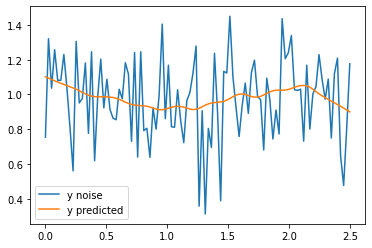

In [24]:
import math
n = 100
x = np.linspace(0, 2.5, n)
y = 1 + 0.25 * np.random.randn(n)
f = 0.25
yest = lowess(x, y, f, n)
print(yest)    
import pylab as pl
pl.clf()
pl.plot(x, y, label = 'y noise')
pl.plot(x, yest, label = 'y predicted')
pl.legend()
pl.show()